In [44]:
import torch 
import torch_geometric as pyg 
import pandas as pd 
import numpy as np 

from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn2, venn3_circles
from matplotlib.patches import Patch

In [3]:
exp1 = {'data':torch.load('../output/from_exacloud/exp1/proc/Data.pt'),
        'sig_ids':np.load('../output/from_exacloud/exp1/proc/sig_ids.npy', allow_pickle=True)}

exp2 = {'data':torch.load('../output/from_exacloud/exp2/proc/Data.pt'),
        'sig_ids':np.load('../output/from_exacloud/exp2/proc/sig_ids.npy', allow_pickle=True)}

exp3 = {'data':torch.load('../output/from_exacloud/exp3/proc/Data.pt'),
        'sig_ids':np.load('../output/from_exacloud/exp3/proc/sig_ids.npy', allow_pickle=True)}

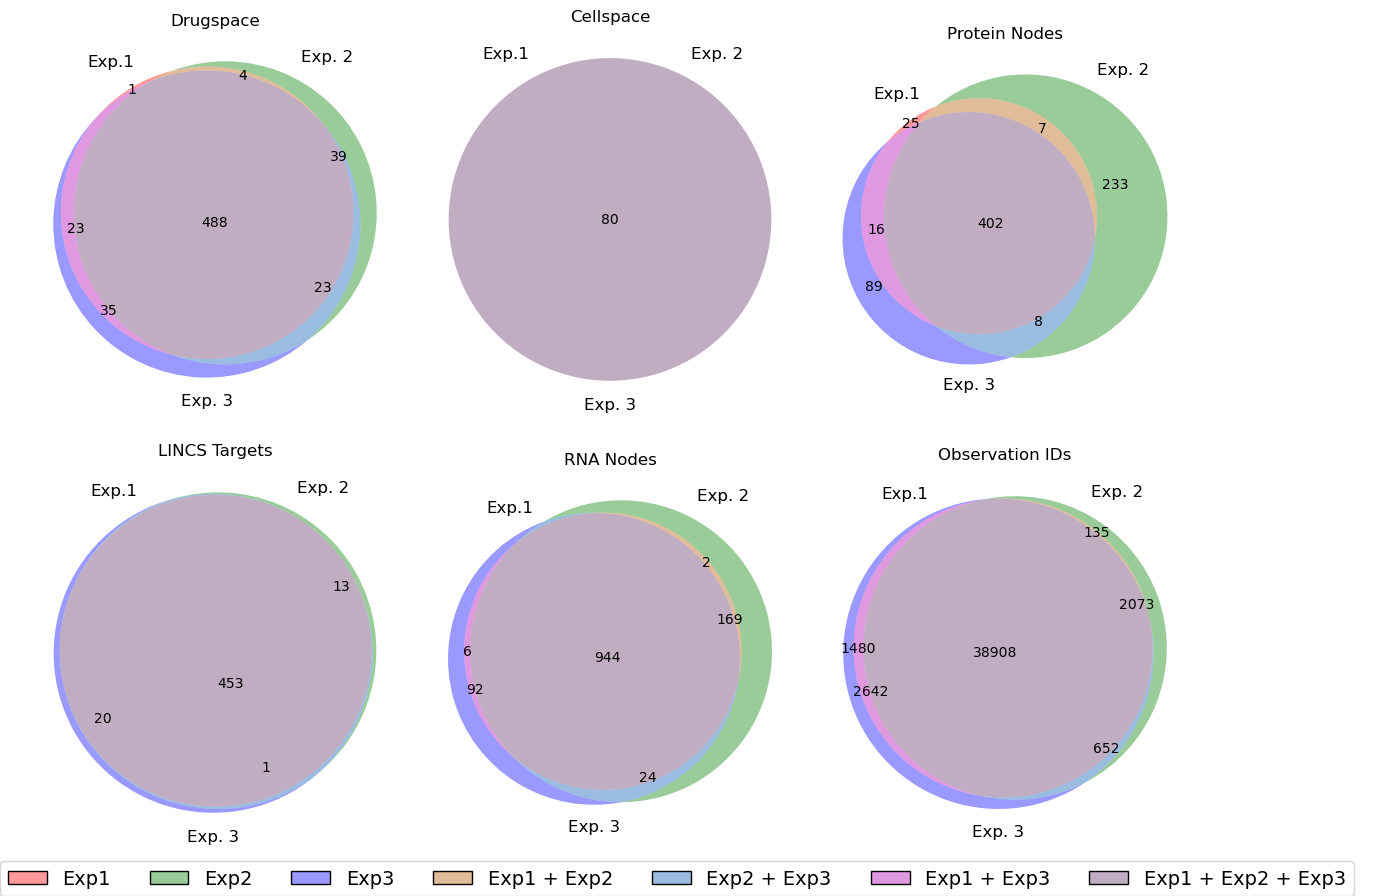

In [68]:
f,axes = plt.subplots(2,3, figsize=(12,9))

axes.flat[0].set_title('Drugspace')
v1 = venn3([set(exp1['data'].drugspace.tolist()), 
       set(exp2['data'].drugspace.tolist()), 
       set(exp3['data'].drugspace.tolist())], ('Exp.1', 'Exp. 2', 'Exp. 3'), ax=axes.flat[0])


axes.flat[1].set_title('Cellspace')
v2 = venn3([set(exp1['data'].cellspace.tolist()), 
      set(exp2['data'].cellspace.tolist()), 
      set(exp3['data'].cellspace.tolist())], ('Exp.1', 'Exp. 2', 'Exp. 3'), ax=axes.flat[1])

axes.flat[2].set_title('Protein Nodes')
v3 = venn3([set([x for x in exp1['data'].node_names.tolist() if 'PROTEIN__' in x]), 
       set([x for x in exp2['data'].node_names.tolist() if 'PROTEIN__' in x]), 
       set([x for x in exp3['data'].node_names.tolist() if 'PROTEIN__' in x])], ('Exp.1', 'Exp. 2', 'Exp. 3'), ax=axes.flat[2])

axes.flat[3].set_title('LINCS Targets')
v4 = venn3([set([x for x in exp1['data'].node_names.tolist() if 'LINCS__' in x]), 
       set([x for x in exp2['data'].node_names.tolist() if 'LINCS__' in x]), 
       set([x for x in exp3['data'].node_names.tolist() if 'LINCS__' in x])], ('Exp.1', 'Exp. 2', 'Exp. 3'), ax=axes.flat[3])

axes.flat[4].set_title('RNA Nodes')
v5 = venn3([set([x for x in exp1['data'].node_names.tolist() if 'RNA__' in x]), 
       set([x for x in exp2['data'].node_names.tolist() if 'RNA__' in x]), 
       set([x for x in exp3['data'].node_names.tolist() if 'RNA__' in x])], ('Exp.1', 'Exp. 2', 'Exp. 3'), ax=axes.flat[4])

axes.flat[5].set_title('Observation IDs')
v6 = venn3([set(exp1['sig_ids'].tolist()), 
       set(exp2['sig_ids'].tolist()), 
       set(exp3['sig_ids'].tolist())], ('Exp.1', 'Exp. 2', 'Exp. 3'), ax=axes.flat[5])

legend_elements = [Patch(facecolor=v1.get_patch_by_id('100').get_facecolor(), edgecolor='k', label='Exp1'), 
                   Patch(facecolor=v1.get_patch_by_id('010').get_facecolor(), edgecolor='k', label='Exp2'),
                   Patch(facecolor=v1.get_patch_by_id('001').get_facecolor(), edgecolor='k', label='Exp3'),
                   Patch(facecolor=v1.get_patch_by_id('110').get_facecolor(), edgecolor='k', label='Exp1 + Exp2'),
                   Patch(facecolor=v1.get_patch_by_id('011').get_facecolor(), edgecolor='k', label='Exp2 + Exp3'),
                   Patch(facecolor=v1.get_patch_by_id('101').get_facecolor(), edgecolor='k', label='Exp1 + Exp3'), 
                   Patch(facecolor=v1.get_patch_by_id('111').get_facecolor(), edgecolor='k', label='Exp1 + Exp2 + Exp3'),]

f.legend(handles=legend_elements, ncol=7, fontsize=14, loc=( 0, 0))

plt.tight_layout()
plt.show()

In [43]:
v1.get_patch_by_id('100').get_facecolor()

(1.0, 0.0, 0.0, 0.4)

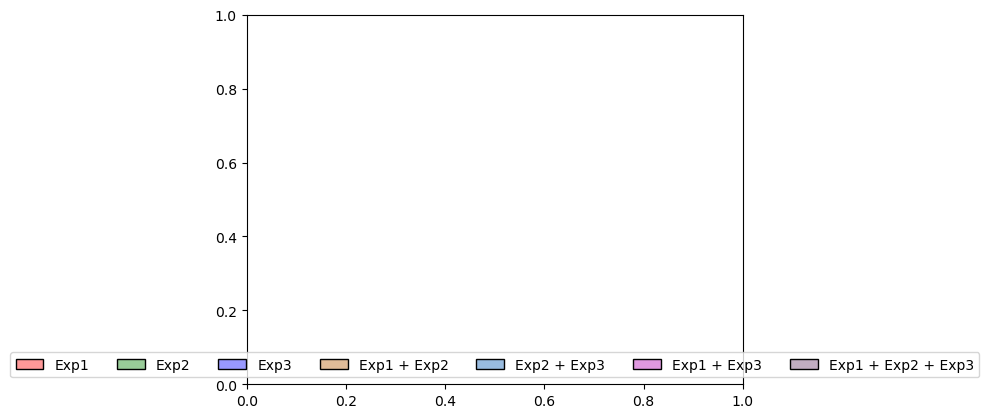

In [55]:
legend_elements = [Patch(facecolor=v1.get_patch_by_id('100').get_facecolor(), edgecolor='k', label='Exp1'), 
                   Patch(facecolor=v1.get_patch_by_id('010').get_facecolor(), edgecolor='k', label='Exp2'),
                   Patch(facecolor=v1.get_patch_by_id('001').get_facecolor(), edgecolor='k', label='Exp3'),
                   Patch(facecolor=v1.get_patch_by_id('110').get_facecolor(), edgecolor='k', label='Exp1 + Exp2'),
                   Patch(facecolor=v1.get_patch_by_id('011').get_facecolor(), edgecolor='k', label='Exp2 + Exp3'),
                   Patch(facecolor=v1.get_patch_by_id('101').get_facecolor(), edgecolor='k', label='Exp1 + Exp3'), 
                   Patch(facecolor=v1.get_patch_by_id('111').get_facecolor(), edgecolor='k', label='Exp1 + Exp2 + Exp3'),]

fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='lower center', ncol=7)

plt.show()

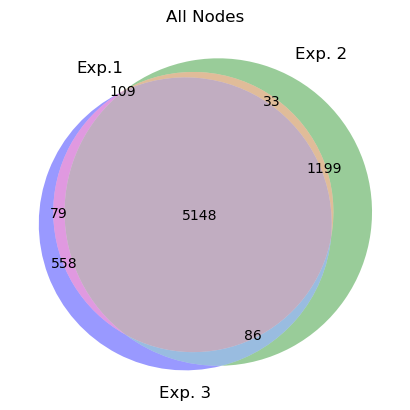

In [26]:
plt.figure()
plt.title('All Nodes')
venn3([set(exp1['data'].node_names.tolist()), set(exp2['data'].node_names.tolist()), set(exp3['data'].node_names.tolist())], ('Exp.1', 'Exp. 2', 'Exp. 3'))
plt.show()

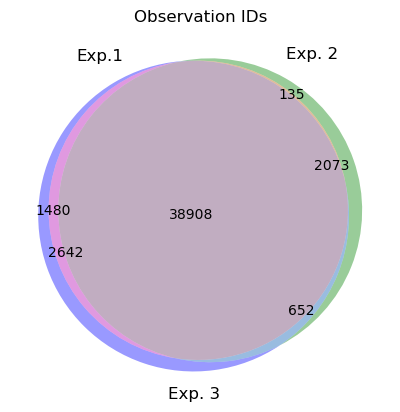

In [21]:
plt.figure()
plt.title('Observation IDs')
venn3([set(exp1['sig_ids'].tolist()), set(exp2['sig_ids'].tolist()), set(exp3['sig_ids'].tolist())], ('Exp.1', 'Exp. 2', 'Exp. 3'))
plt.show()